In [1]:
import pandas as pd
df = pd.read_csv("ad_spend.csv")
df.head(3)

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214


In [4]:
g=df.groupby("Season")[["Ad Spend ($)","Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


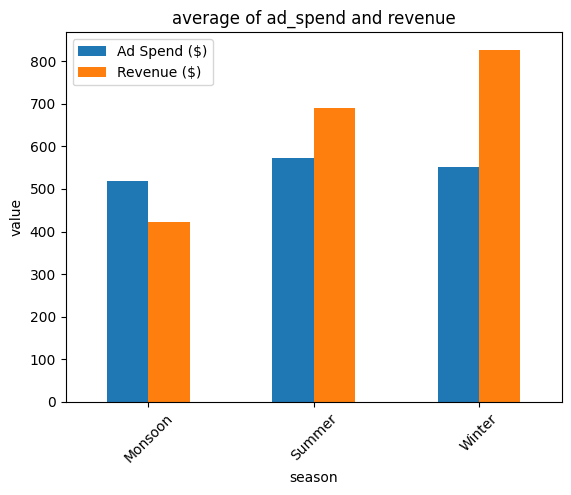

In [13]:
from matplotlib import pyplot as plt

pt = g.plot(kind="bar")
pt.set_xlabel("season")
pt.set_ylabel("value")
pt.set_title("average of ad_spend and revenue")

plt.xticks(rotation=45)
plt.show()

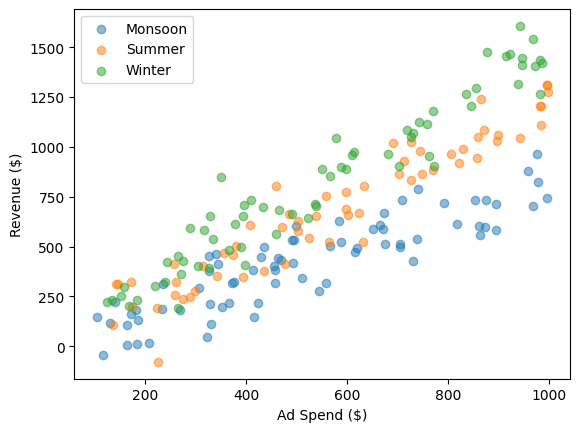

In [23]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"],subdf["Revenue ($)"],label=season, alpha=0.5)
    plt.xlabel("Ad Spend ($)")
    plt.ylabel("Revenue ($)")
    plt.legend()
plt.show()

In [27]:
df_encoded = pd.get_dummies(df,columns=["Season"],drop_first =True)
df_encoded.head(3)

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False


In [30]:
### traing

In [39]:
from sklearn.model_selection import train_test_split

X=df_encoded[['Ad Spend ($)','Season_Summer','Season_Winter']]
y=df_encoded['Revenue ($)']
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9004557896885321

In [41]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8354902585133208

### traing data :GDM

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8798790499639078

In [47]:
y_pred = model.predict(X_test)
df = pd.DataFrame({"Actually": y_test,"predicted":y_pred})
df.head()

,Actually,predicted
95,903,952.213112
15,1047,902.660844
30,1026,878.402352
158,1203,1288.656386
128,558,667.667675


In [51]:
df["diff%"] = abs((df["predicted"] - df["Actually"])*100/df["Actually"])
df

,Actually,predicted,diff%
95,903,952.213112,5.449957
15,1047,902.660844,13.785975
30,1026,878.402352,14.385736
158,1203,1288.656386,7.120232
128,558,667.667675,19.653705
115,354,478.959933,35.299416
69,1446,1465.647734,1.358764
170,108,258.615359,139.458666
174,375,268.099531,28.506792
45,522,568.063068,8.824343
